# 빅데이터분석 특강 기말고사

- toc:true
- branch: master
- badges: true
- comments: false
- author: 최서연
- categories: [Special Topics in Big Data Analysis]

## imports

In [1]:
import numpy as np
import matplotlib.pyplot as plt 
import tensorflow as tf 
import tensorflow.experimental.numpy as tnp 

In [2]:
tnp.experimental_enable_numpy_behavior()

In [3]:
%load_ext tensorboard

In [4]:
import graphviz
def gv(s): return graphviz.Source('digraph G{ rankdir="LR"'+ s + ';}')

## 1. Fashion_mnist, DNN (30점)

`(1)` `tf.keras.datasets.fashion_mnist.load_data()`을 이용하여 fashion_mnist 자료를 불러온 뒤 아래의 네트워크를 이용하여 적합하라. 

In [5]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.fashion_mnist.load_data()

In [6]:
x_train.shape, y_train.shape, x_test.shape, y_test.shape

((60000, 28, 28), (60000,), (10000, 28, 28), (10000,))

In [8]:
X = tf.constant(x_train.reshape(-1,28,28,1),dtype=tf.float64)
y = tf.keras.utils.to_categorical(y_train)
XX = tf.constant(x_test.reshape(-1,28,28,1),dtype=tf.float64)
yy = tf.keras.utils.to_categorical(y_test)

- 평가지표로 accuracy를 이용할 것 
- epoch은 10으로 설정할 것 
- optimizer는 adam을 이용할 것 

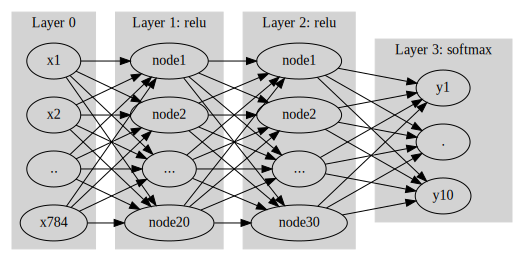

In [3]:
#collapse
gv('''
splines=line
subgraph cluster_1{
    style=filled;
    color=lightgrey;
    "x1"
    "x2"
    ".."
    "x784"
    label = "Layer 0"
}
subgraph cluster_2{
    style=filled;
    color=lightgrey;
    "x1" -> "node1"
    "x2" -> "node1"
    ".." -> "node1"
    "x784" -> "node1"
    
    "x1" -> "node2"
    "x2" -> "node2"
    ".." -> "node2"
    "x784" -> "node2"
    
    "x1" -> "..."
    "x2" -> "..."
    ".." -> "..."
    "x784" -> "..."

    "x1" -> "node20"
    "x2" -> "node20"
    ".." -> "node20"
    "x784" -> "node20"


    label = "Layer 1: relu"
}
subgraph cluster_3{
    style=filled;
    color=lightgrey;
    "node1" -> "node1 "
    "node2" -> "node1 "
    "..." -> "node1 "
    "node20" -> "node1 "
    
    "node1" -> "node2 "
    "node2" -> "node2 "
    "..." -> "node2 "
    "node20" -> "node2 "
    
    "node1" -> "... "
    "node2" -> "... "
    "..." -> "... "
    "node20" -> "... "

    "node1" -> "node30 "
    "node2" -> "node30 "
    "..." -> "node30 "
    "node20" -> "node30 "


    label = "Layer 2: relu"
}
subgraph cluster_4{
    style=filled;
    color=lightgrey;

    "node1 " -> "y10"
    "node2 " -> "y10"
    "... " -> "y10"
    "node30 " -> "y10"
    
    "node1 " -> "y1"
    "node2 " -> "y1"
    "... " -> "y1"
    "node30 " -> "y1"
    
    "node1 " -> "."
    "node2 " -> "."
    "... " -> "."
    "node30 " -> "."
    
    label = "Layer 3: softmax"
}
''')


In [9]:
tf.random.set_seed(1213)
!rm -rf logs
net = tf.keras.Sequential()
net.add(tf.keras.layers.Flatten())
net.add(tf.keras.layers.Dense(20,activation='relu'))
net.add(tf.keras.layers.Dense(30,activation='relu'))
net.add(tf.keras.layers.Dense(10,activation='softmax'))
net.compile(optimizer='adam',loss=tf.losses.categorical_crossentropy,metrics='accuracy')
net.fit(X,y,epochs=10,batch_size=200)

Epoch 1/10
 51/300 [====>.........................] - ETA: 0s - loss: 10.3140 - accuracy: 0.1126

2022-06-12 20:20:18.074442: I tensorflow/stream_executor/cuda/cuda_blas.cc:1774] TensorFloat-32 will be used for the matrix multiplication. This will only be logged once.


300/300 [==============================] - 2s 3ms/step - loss: 3.3773 - accuracy: 0.1935
Epoch 2/10
300/300 [==============================] - 1s 4ms/step - loss: 1.7547 - accuracy: 0.2837
Epoch 3/10
300/300 [==============================] - 1s 4ms/step - loss: 1.5505 - accuracy: 0.3734
Epoch 4/10
300/300 [==============================] - 1s 4ms/step - loss: 1.3838 - accuracy: 0.4317
Epoch 5/10
300/300 [==============================] - 1s 4ms/step - loss: 1.2905 - accuracy: 0.4512
Epoch 6/10
300/300 [==============================] - 1s 4ms/step - loss: 1.2546 - accuracy: 0.4586
Epoch 7/10
300/300 [==============================] - 1s 4ms/step - loss: 1.2338 - accuracy: 0.4630
Epoch 8/10
300/300 [==============================] - 1s 4ms/step - loss: 1.2205 - accuracy: 0.4682
Epoch 9/10
300/300 [==============================] - 1s 4ms/step - loss: 1.2067 - accuracy: 0.4745
Epoch 10/10
300/300 [==============================] - 1s 4ms/step - loss: 1.1229 - accuracy: 0.5188


In [10]:
net.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (200, 784)                0         
                                                                 
 dense (Dense)               (200, 20)                 15700     
                                                                 
 dense_1 (Dense)             (200, 30)                 630       
                                                                 
 dense_2 (Dense)             (200, 10)                 310       
                                                                 
Total params: 16,640
Trainable params: 16,640
Non-trainable params: 0
_________________________________________________________________


`(2)` (1)에서 적합된 네트워크를 이용하여 test data의 accuracy를 구하라. 

In [11]:
net.evaluate(XX,yy)[1]

313/313 [==============================] - 1s 3ms/step - loss: 1.1249 - accuracy: 0.5273


0.5273000001907349

`(3)` train set에서 20%의 자료를 validation 으로 분리하여 50에폭동안 학습하라. 텐서보드를 이용하여 train accuracy와 validation accuracy를 시각화 하고 결과를 해석하라. 오버피팅이라고 볼 수 있는가? 

In [12]:
tf.random.set_seed(1213)
!rm -rf logs
net = tf.keras.Sequential()
net.add(tf.keras.layers.Flatten())
net.add(tf.keras.layers.Dense(20,activation='relu'))
net.add(tf.keras.layers.Dense(30,activation='relu'))
net.add(tf.keras.layers.Dense(10,activation='softmax'))
net.compile(optimizer='adam',loss=tf.losses.categorical_crossentropy,metrics='accuracy')

In [13]:
cb1 = tf.keras.callbacks.TensorBoard()
net.fit(X,y,epochs=50,batch_size=200,validation_split=0.2,callbacks=cb1,verbose=1)

Epoch 1/50
240/240 [==============================] - 1s 5ms/step - loss: 3.5097 - accuracy: 0.1968 - val_loss: 1.8552 - val_accuracy: 0.2494
Epoch 2/50
240/240 [==============================] - 1s 5ms/step - loss: 1.7568 - accuracy: 0.2974 - val_loss: 1.7041 - val_accuracy: 0.3078
Epoch 3/50
240/240 [==============================] - 1s 5ms/step - loss: 1.6305 - accuracy: 0.3401 - val_loss: 1.5662 - val_accuracy: 0.3707
Epoch 4/50
240/240 [==============================] - 1s 5ms/step - loss: 1.4904 - accuracy: 0.4000 - val_loss: 1.4276 - val_accuracy: 0.4173
Epoch 5/50
240/240 [==============================] - 1s 5ms/step - loss: 1.3527 - accuracy: 0.4417 - val_loss: 1.3184 - val_accuracy: 0.4498
Epoch 6/50
240/240 [==============================] - 1s 5ms/step - loss: 1.2798 - accuracy: 0.4554 - val_loss: 1.2782 - val_accuracy: 0.4569
Epoch 7/50
240/240 [==============================] - 1s 5ms/step - loss: 1.2515 - accuracy: 0.4604 - val_loss: 1.2648 - val_accuracy: 0.4592
Epoch 

In [15]:
%tensorboard --logdir logs --host 0.0.0.0

Reusing TensorBoard on port 6006 (pid 2281220), started 0:00:00 ago. (Use '!kill 2281220' to kill it.)

train accuracy보다validation accuracy accuracy가 0.01정도 높게 나왔다.

우리의 목적은 validation accuracy가 더 좋게 나오길 원하는 것이었다.

training loss와 같이 validation loss도 줄어들고 있었다.

비록 중간에 조금 상승하는 구간이 보이지만 결국 training loss와 비슷한 값에 수렴했다.(0.01 정도 차이)

오버피팅은 아니다.

`(4)` (3)에서 적합된 네트워크를 이용하여 test data의 accuracy를 구하라. (2)의 결과와 비교하라. 

In [17]:
net.evaluate(XX,yy)[1]

313/313 [==============================] - 1s 4ms/step - loss: 0.6505 - accuracy: 0.7786


0.7785999774932861

validation을 split하여 training하니 정확도가 높아졌다.

20%의 validation을 제외한 training data로 학습을 한 것보다 20%의 validation의 loss가 더 낮아지는 결과가 도출되었다.

`(5)` 조기종료기능을 이용하여 (3)의 네트워크를 다시 학습하라. 학습결과를 텐서보드를 이용하여 시각화 하라. 
- patience=3 으로 설정할 것

In [307]:
tf.random.set_seed(1213)
!rm -rf logs
net = tf.keras.Sequential()
net.add(tf.keras.layers.Flatten())
net.add(tf.keras.layers.Dense(20,activation='relu'))
net.add(tf.keras.layers.Dense(30,activation='relu'))
net.add(tf.keras.layers.Dense(10,activation='softmax'))
net.compile(optimizer='adam',loss=tf.losses.categorical_crossentropy,metrics='accuracy')

In [308]:
cb1 = tf.keras.callbacks.TensorBoard()
cb2 = tf.keras.callbacks.EarlyStopping(patience=3)
net.fit(X,y,epochs=50,batch_size=200,validation_split=0.2,callbacks=[cb1,cb2]) 

Epoch 1/50
240/240 [==============================] - 2s 8ms/step - loss: 3.5097 - accuracy: 0.1968 - val_loss: 1.8552 - val_accuracy: 0.2495
Epoch 2/50
240/240 [==============================] - 1s 4ms/step - loss: 1.7548 - accuracy: 0.2991 - val_loss: 1.6986 - val_accuracy: 0.3088
Epoch 3/50
240/240 [==============================] - 2s 7ms/step - loss: 1.6166 - accuracy: 0.3491 - val_loss: 1.5575 - val_accuracy: 0.3804
Epoch 4/50
240/240 [==============================] - 1s 5ms/step - loss: 1.4841 - accuracy: 0.4009 - val_loss: 1.4335 - val_accuracy: 0.4156
Epoch 5/50
240/240 [==============================] - 1s 6ms/step - loss: 1.3541 - accuracy: 0.4414 - val_loss: 1.3242 - val_accuracy: 0.4461
Epoch 6/50
240/240 [==============================] - 1s 5ms/step - loss: 1.2795 - accuracy: 0.4547 - val_loss: 1.2824 - val_accuracy: 0.4543
Epoch 7/50
240/240 [==============================] - 2s 7ms/step - loss: 1.2504 - accuracy: 0.4594 - val_loss: 1.2627 - val_accuracy: 0.4586
Epoch 

In [310]:
%tensorboard --logdir logs --host 0.0.0.0

Reusing TensorBoard on port 6006 (pid 2045929), started 0:00:04 ago. (Use '!kill 2045929' to kill it.)

## 2. Fashion_mnist, CNN (30점)

`(1)` `tf.keras.datasets.fashion_mnist.load_data()`을 이용하여 fashion_mnist 자료를 불러온 뒤 아래의 네트워크를 이용하여 적합하라. 

In [240]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.fashion_mnist.load_data()

In [241]:
X = tf.constant(x_train.reshape(-1,28,28,1),dtype=tf.float64)
y = tf.keras.utils.to_categorical(y_train)
XX = tf.constant(x_test.reshape(-1,28,28,1),dtype=tf.float64)
yy = tf.keras.utils.to_categorical(y_test)

- 이때 n1=6, n2=16, n3=120 으로 설정한다, 드랍아웃비율은 20%로 설정한다.
- `net.summary()`를 출력하여 설계결과를 확인하라.

![](https://editor.analyticsvidhya.com/uploads/90650dnn2.jpeg)

In [242]:
tf.random.set_seed(1213)
!rm -rf logs
net = tf.keras.Sequential()
net.add(tf.keras.layers.Conv2D(6,(5,5),activation='relu'))
net.add(tf.keras.layers.MaxPool2D())
net.add(tf.keras.layers.Conv2D(16,(5,5),activation='relu'))
net.add(tf.keras.layers.MaxPool2D())
net.add(tf.keras.layers.Flatten())
net.add(tf.keras.layers.Dense(120,activation='relu'))
net.add(tf.keras.layers.Dropout(0.2))
net.add(tf.keras.layers.Dense(10,activation='softmax'))
net.compile(optimizer='adam',loss=tf.losses.categorical_crossentropy,metrics='accuracy')
net.fit(X,y,epochs=5)

Epoch 1/5
1875/1875 [==============================] - 8s 4ms/step - loss: 0.8791 - accuracy: 0.7674
Epoch 2/5
1875/1875 [==============================] - 10s 5ms/step - loss: 0.4308 - accuracy: 0.8436
Epoch 3/5
1875/1875 [==============================] - 10s 5ms/step - loss: 0.3858 - accuracy: 0.8593
Epoch 4/5
1875/1875 [==============================] - 9s 5ms/step - loss: 0.3617 - accuracy: 0.8671
Epoch 5/5
1875/1875 [==============================] - 8s 5ms/step - loss: 0.3410 - accuracy: 0.8731


In [243]:
net.layers

In [244]:
c1,m1,c2,m2,flttn,rel,dro,dns = net.layers

print(X.shape) 
print(c1(X).shape) 
print(m1(c1(X)).shape) 
print(c2(m1(c1(X))).shape) 
print(m2(c2(m1(c1(X)))).shape) 
print(flttn(m2(c2(m1(c1(X))))).shape) 
print(rel(flttn(m2(c2(m1(c1(X)))))).shape) 
print(dro(rel(flttn(m2(c2(m1(c1(X))))))).shape) 
print(dns(dro(rel(flttn(m2(c2(m1(c1(X)))))))).shape) 

(60000, 28, 28, 1)
(60000, 24, 24, 6)
(60000, 12, 12, 6)
(60000, 8, 8, 16)
(60000, 4, 4, 16)
(60000, 256)
(60000, 120)
(60000, 120)
(60000, 10)


In [245]:
net.summary()

Model: "sequential_200"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_394 (Conv2D)         (32, 24, 24, 6)           156       
                                                                 
 max_pooling2d_390 (MaxPooli  (32, 12, 12, 6)          0         
 ng2D)                                                           
                                                                 
 conv2d_395 (Conv2D)         (32, 8, 8, 16)            2416      
                                                                 
 max_pooling2d_391 (MaxPooli  (32, 4, 4, 16)           0         
 ng2D)                                                           
                                                                 
 flatten_200 (Flatten)       (32, 256)                 0         
                                                                 
 dense_403 (Dense)           (32, 120)              

`(2)` n1=(6,64,128), n2=(16,256)에 대하여 test set의 loss가 최소화되는 조합을 찾아라. 결과를 텐서보드로 시각화하는 코드를 작성하라. 
- epoc은 3회로 한정한다. 
- validation_split은 0.2로 설정한다. 

In [222]:
from tensorboard.plugins.hparams import api as hp

In [248]:
a=[]

In [249]:
tf.random.set_seed(1213)
!rm -rf logs
for u in [6,64,128]: 
    for d in [16,256]: 
        logdir = 'logs/hp_{}_{}'.format(u,d)
        with tf.summary.create_file_writer(logdir).as_default():
            net = tf.keras.Sequential()
            net.add(tf.keras.layers.Conv2D(u,(5,5),activation='relu'))
            net.add(tf.keras.layers.MaxPool2D())
            net.add(tf.keras.layers.Conv2D(d,(5,5),activation='relu'))
            net.add(tf.keras.layers.MaxPool2D())
            net.add(tf.keras.layers.Flatten())
            net.add(tf.keras.layers.Dense(120,activation='relu'))
            net.add(tf.keras.layers.Dropout(0.2))
            net.add(tf.keras.layers.Dense(10,activation='softmax'))
            net.compile(optimizer='adam',loss=tf.losses.categorical_crossentropy,metrics='accuracy')
            cb3 = hp.KerasCallback(logdir, {'n1':u, 'n2':d})
            net.fit(X,y,epochs=3,batch_size=200,validation_split=0.2,callbacks=cb3)
            _rslt=net.evaluate(XX,yy)
            a.append(_rslt[0])
            tf.summary.scalar('loss(테스트셋)',_rslt[0], step=1) 

Epoch 1/3
240/240 [==============================] - 3s 10ms/step - loss: 2.2066 - accuracy: 0.6594 - val_loss: 0.5792 - val_accuracy: 0.7904
Epoch 2/3
240/240 [==============================] - 2s 8ms/step - loss: 0.5800 - accuracy: 0.7913 - val_loss: 0.4755 - val_accuracy: 0.8284
Epoch 3/3
313/313 [==============================] - 2s 6ms/step - loss: 0.4550 - accuracy: 0.8348
Epoch 1/3
240/240 [==============================] - 3s 8ms/step - loss: 1.2998 - accuracy: 0.7496 - val_loss: 0.3960 - val_accuracy: 0.8584
Epoch 2/3
240/240 [==============================] - 2s 9ms/step - loss: 0.4058 - accuracy: 0.8568 - val_loss: 0.3453 - val_accuracy: 0.8751
Epoch 3/3
313/313 [==============================] - 2s 4ms/step - loss: 0.3444 - accuracy: 0.8784
Epoch 1/3
240/240 [==============================] - 2s 8ms/step - loss: 1.6604 - accuracy: 0.5781 - val_loss: 0.6658 - val_accuracy: 0.7638
Epoch 2/3
240/240 [==============================] - 2s 9ms/step - loss: 0.6420 - accuracy: 0.77

In [251]:
%tensorboard --logdir logs --host 0.0.0.0

In [252]:
a

[0.4550354480743408,
 0.34435006976127625,
 0.522118866443634,
 0.3027571737766266,
 0.45646074414253235,
 0.2948054075241089]

위는 순서대로
- $n_1$=(6), $n_2$=(16)
- $n_1$=(6), $n_2$=(256)
- $n_1$=(64), $n_2$=(16)
- $n_1$=(64), $n_2$=(256)
- $n_1$=(128), $n_2$=(16)
- $n_1$=(128), $n_2$=(256)

을 나타낸다.

> $\therefore$ $n_1=128, n_2 = 256$에서 test set의 loss가 $0.2948054075241089$로 최소화된다.

## 3. CIFAR10 (30점)

`tf.keras.datasets.cifar10.load_data()`을 이용하여 CIFAR10을 불러온 뒤 적당한 네트워크를 사용하여 적합하라. 

In [234]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.cifar10.load_data()

In [235]:
x_train.shape, y_train.shape, x_test.shape, y_test.shape

((50000, 32, 32, 3), (50000, 1), (10000, 32, 32, 3), (10000, 1))

In [236]:
X=x_train.reshape(-1,32,32,3)/255 # 50000 by 1024 by 
y=tf.keras.utils.to_categorical(y_train) 
XX=x_test.reshape(-1,32,32,3)/255
yy=tf.keras.utils.to_categorical(y_test)

In [237]:
X.shape,y.shape,XX.shape,yy.shape

((50000, 32, 32, 3), (50000, 10), (10000, 32, 32, 3), (10000, 10))

- 결과를 텐서보드로 시각화할 필요는 없다. 
- 자유롭게 모형을 설계하여 적합하라. 
- test set의 accuracy가 70%이상인 경우만 정답으로 인정한다. 

In [238]:
tf.random.set_seed(1213)
net = tf.keras.Sequential()
net.add(tf.keras.layers.Conv2D(98,(2,2),activation='relu'))
net.add(tf.keras.layers.Conv2D(98,(2,2),activation='relu'))
net.add(tf.keras.layers.MaxPool2D())
net.add(tf.keras.layers.Conv2D(256,(2,2),activation='relu'))
net.add(tf.keras.layers.Conv2D(256,(2,2),activation='relu'))
net.add(tf.keras.layers.MaxPool2D())
net.add(tf.keras.layers.Flatten())
net.add(tf.keras.layers.Dense(256,activation='relu'))
net.add(tf.keras.layers.Dropout(0.2))
net.add(tf.keras.layers.Dense(10,activation='softmax'))
net.compile(optimizer='adam',loss=tf.losses.categorical_crossentropy,metrics='accuracy')
net.fit(X,y,epochs=5,validation_split=0.2)

Epoch 1/5
1250/1250 [==============================] - 11s 8ms/step - loss: 1.4445 - accuracy: 0.4749 - val_loss: 1.0996 - val_accuracy: 0.6179
Epoch 2/5
1250/1250 [==============================] - 9s 7ms/step - loss: 0.9984 - accuracy: 0.6500 - val_loss: 0.9094 - val_accuracy: 0.6784
Epoch 3/5
1250/1250 [==============================] - 9s 7ms/step - loss: 0.8065 - accuracy: 0.7190 - val_loss: 0.8279 - val_accuracy: 0.7145
Epoch 4/5
1250/1250 [==============================] - 10s 8ms/step - loss: 0.6654 - accuracy: 0.7656 - val_loss: 0.7672 - val_accuracy: 0.7406
Epoch 5/5
1250/1250 [==============================] - 10s 8ms/step - loss: 0.5462 - accuracy: 0.8066 - val_loss: 0.7723 - val_accuracy: 0.7448


In [239]:
net.evaluate(XX,yy)[1]

313/313 [==============================] - 2s 6ms/step - loss: 0.7952 - accuracy: 0.7404


0.7404000163078308

## 4. 다음을 읽고 물음에 답하라. (10점)

(1) (128,128,3)의 shape을 가진 텐서가 `tf.keras.layers.Conv2D(5,(2,2))`으로 만들어진 커널을 통과할시 나오는 shape은?

In [14]:
cnv = tf.keras.layers.Conv2D(5,(2,2))

In [15]:
XXX = tnp.arange(1*128*128*3,dtype=tf.float64).reshape(1,128,128,3)

In [17]:
cnv(XXX).shape

TensorShape([1, 127, 127, 5])

answer: `(1, 127, 127, 5)`

(2) (24,24,16)의 shape을 가진 텐서가 `tf.keras.layers.Flatten()`을 통과할때 나오는 텐서의 shape은? 

In [18]:
24*24*16

9216

In [19]:
flltn = tf.keras.layers.Flatten()

In [20]:
XXX = tnp.arange(1*24*24*16,dtype=tf.float64).reshape(1,24,24,16)

In [21]:
flltn(XXX).shape

TensorShape([1, 9216])

answerL `(1,9216)`

***(3)-(5)***

아래와 같은 모형을 고려하자. 

$$y_i= \beta_0 + \sum_{k=1}^{5} \beta_k \cos(k t_i)+\epsilon_i$$

여기에서 $t=(t_1,\dots,t_{1000})=$ `np.linspace(0,5,1000)` 이다. 그리고 $\epsilon_i \sim i.i.d~ N(0,\sigma^2)$, 즉 서로 독립인 표준정규분포에서 추출된 샘플이다. 위의 모형에서 아래와 같은 데이터를 관측했다고 가정하자. 

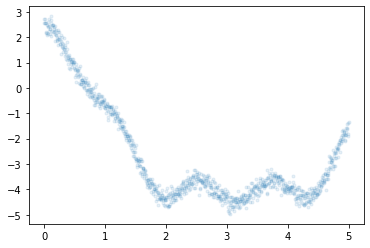

In [9]:
np.random.seed(43052)
t= np.linspace(0,5,1000)
y = -2+ 3*np.cos(t) + 1*np.cos(2*t) + 0.5*np.cos(5*t) + np.random.randn(1000)*0.2
plt.plot(t,y,'.',alpha=0.1)

`(3)` 모형에 대한 설명 중 옳은 것을 모두 골라라. 

(하영) 이 모형의 경우 MSEloss를 최소화하는 $\hat{\beta}_0,\dots,\hat{\beta}_5$를 구하는것은 최대우도함수를 최대화하는 $\hat{\beta}_0,\dots,\hat{\beta}_5$를 구하는 것과 같다. 

(재인) 하영의 말이 옳은 이유는 오차항이 정규분포를 따른다는 가정이 있기 때문이다. 

(서연) 이 모형에서 적절한 학습률이 선택되더라도 경사하강법을 이용하면 MSEloss를 최소화하는 $\hat{\beta}_0,\dots,\hat{\beta}_5$를 종종 구할 수 없는 문제가 생긴다. 왜냐하면 손실함수가 convex하지 않아서 local minimum에 빠질 위험이 있기 때문이다. 

(규빈) 만약에 경사하강법 대신 확률적 경사하강법을 쓴다면 local minimum을 언제나 탈출 할 수 있다. 따라서 서연이 언급한 문제점은 생기지 않는다. 

answer: 하영, 재인, 서연

`(4)` 다음은 아래 모형을 학습한 결과이다. 옳게 해석한 것을 모두 고르시오. 

In [10]:
y = y.reshape(1000,1)
x1 = np.cos(t) 
x2 = np.cos(2*t)
x3 = np.cos(3*t)
x4 = np.cos(4*t)
x5 = np.cos(5*t)
X = tf.stack([x1,x2,x3,x4,x5],axis=1)

In [11]:
net = tf.keras.Sequential()
net.add(tf.keras.layers.Dense(1)) 
net.compile(loss='mse',optimizer='adam')
net.fit(X,y,epochs=500,batch_size=100, validation_split=0.45,verbose=0) 

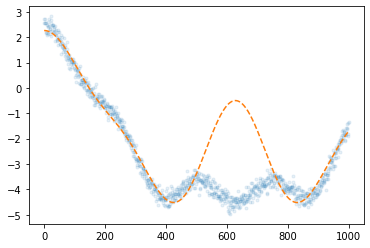

In [12]:
plt.plot(y,'.',alpha=0.1)
plt.plot(net(X),'--')

(재인) 처음 550개의 데이터만 학습하고 이후의 450개의 데이터는 학습하지 않고 validation으로 이용하였다. 

(서연) validation에서의 적합결과가 좋지 않다. 

(규빈) validation의 적합결과가 좋지 않기 때문에 오버피팅을 의심할 수 있다. 따라서 만약에 네트워크에 드랍아웃층을 추가한다면 오버피팅을 방지하는 효과가 있어 validation의 loss가 줄어들 것이다. 

(하영) 이 모형의 경우 더 많은 epoch으로 학습한다면 train loss와 validation loss를 둘 다 줄일 수 있다.

answer: 재인, 서연, 규빈

`(5)` 다음을 잘 읽고 참 거짓을 판별하라.  

- Convolution은 선형변환이다. 

answer: 참

- CNN을 이용하면 언제나 손실함수를 MSEloss로 선택해야 한다. 

answer: 거짓

- CNN은 adam optimizer를 통해서만 최적화할 수 있다.

answer: 거짓

- 이미지자료는 CNN을 이용하여서만 분석할 수 있으며 DNN으로는 분석불가능하다.

answer: 거짓

- CNN은 칼라이미지일 경우에만 적용가능하다.

answer: 거짓